<a href="https://colab.research.google.com/github/aru007-sorce/TheCalculator/blob/main/Anomaly_testing_of_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/train.csv')

In [5]:
cf=pd.read_csv('/content/test.csv')

In [6]:
df.head(5)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [7]:
cf.head(5)

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [9]:
df.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [10]:
df.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [11]:
df['is_anomaly']=df['is_anomaly'].astype(str)
type(['is_anomaly'])

list

In [12]:
df.head(5)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [13]:
df.replace(('False','True'),(1,0), inplace=True)

In [14]:
df

,timestamp,value,is_anomaly,predicted
0,1425008573,42,1,44.072500
1,1425008873,41,1,50.709390
2,1425009173,41,1,81.405120
3,1425009473,61,1,39.950367
4,1425009773,44,1,35.350160
...,...,...,...,...
15825,1429756073,44,1,53.624115
15826,1429756373,45,1,59.752296
15827,1429756673,48,1,52.147630
15828,1429756973,26,1,58.007545


In [15]:
df.corr()

,timestamp,value,is_anomaly,predicted
timestamp,1.000000,0.032628,-0.016457,0.030462
value,0.032628,1.000000,-0.324859,0.445180
is_anomaly,-0.016457,-0.324859,1.000000,-0.059719
predicted,0.030462,0.445180,-0.059719,1.000000


In [16]:
df.drop(['timestamp'],axis=1)

,value,is_anomaly,predicted
0,42,1,44.072500
1,41,1,50.709390
2,41,1,81.405120
3,61,1,39.950367
4,44,1,35.350160
...,...,...,...
15825,44,1,53.624115
15826,45,1,59.752296
15827,48,1,52.147630
15828,26,1,58.007545


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='is_anomaly', ylabel='count'>

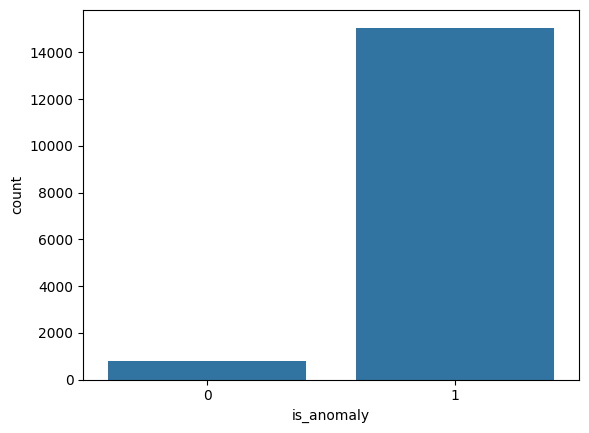

In [18]:
sns.countplot(x='is_anomaly',data=df)

<Axes: xlabel='predicted', ylabel='Count'>

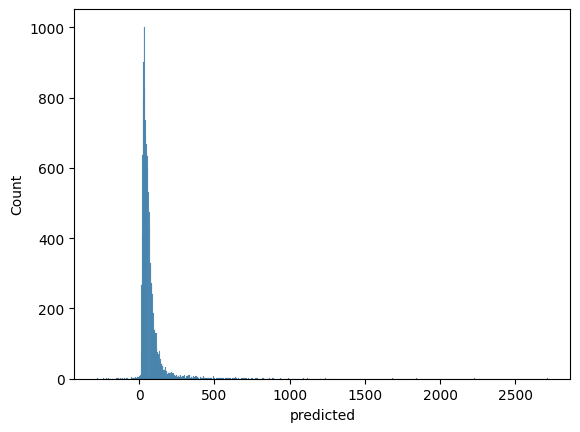

In [19]:
sns.histplot(x='predicted',data=df)

<Axes: xlabel='value', ylabel='Count'>

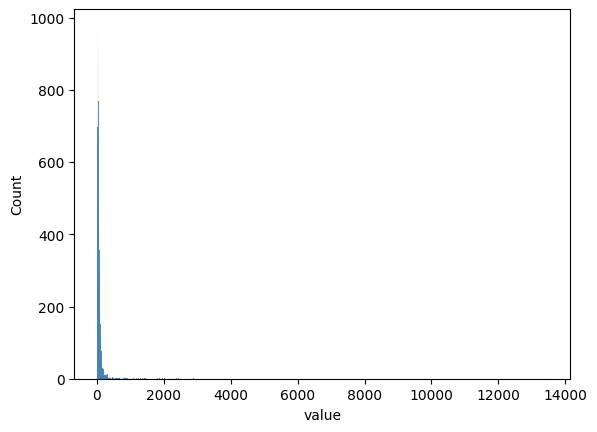

In [20]:
sns.histplot(x='value',data=df)

In [21]:
x= df.drop(['is_anomaly','timestamp'], axis=1)
y= df['is_anomaly']

In [22]:
x


,value,predicted
0,42,44.072500
1,41,50.709390
2,41,81.405120
3,61,39.950367
4,44,35.350160
...,...,...
15825,44,53.624115
15826,45,59.752296
15827,48,52.147630
15828,26,58.007545


In [23]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15825    1
15826    1
15827    1
15828    1
15829    1
Name: is_anomaly, Length: 15830, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [27]:
knn.score(x_test,y_test)

0.9730091883614089

In [28]:
test_data=cf.drop(['timestamp'],axis=1)

In [29]:
test_data

,value,predicted
0,20.00000,20.000000
1,20.00000,20.000000
2,20.00000,20.000000
3,20.00000,20.000000
4,20.00000,20.000000
...,...,...
3955,20.00384,19.836240
3956,20.00384,19.207998
3957,20.00384,20.103437
3958,20.00384,19.346764


In [30]:
predicted_data=knn.predict(test_data)

In [32]:
cf['is_anomaly']=predicted_data

In [33]:
cf=cf.drop(['value','predicted'],axis=1)

In [34]:
cf

,timestamp,is_anomaly
0,1396332000,1
1,1396332300,1
2,1396332600,1
3,1396332900,1
4,1396333200,1
...,...,...
3955,1397518500,1
3956,1397518800,1
3957,1397519100,1
3958,1397519400,1
